In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 1

In [2]:
def initialize_all(a,b,y0,h):
    """
    Given an initial and final time a and b, with y(a)=y0, and step size h,
     return several things.
    X: an aray from a to b with n elements, where n is the number of steps from a to b.
    Y: an empty array of size (n, y.size), Y[0]=y0.
    h: the step size.
    n: the number of steps to be taken.
    """
    n = int((b-a)/h+1)
    X = np.linspace(a, b, n)
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X, Y, h, int(n)

def euler(f,X,Y,h,n):
    """Use the Euler method to compute an approximate solution
    to the ODE y' = f(t, y) over X.
    Y[0] = y0
    f is assumed to accept two arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of X.
    """
    #return None
    for i in range(len(X[1:])) :
        Y[i+1] = Y[i] + h*f(X[i],Y[i])
    return Y

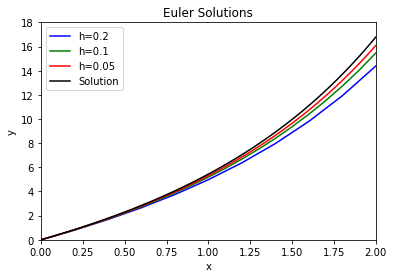

In [3]:
# Initialize values
f = lambda t,y : y-2*t+4
y0 = 0
a = 0
b = 2
h0 = 0.2
h1 = 0.1
h2 = 0.05
# Call initialize_all
X0,Y0,h0,n0 = initialize_all(a,b,y0,h0)
X1,Y1,h1,n1 = initialize_all(a,b,y0,h1)
X2,Y2,h2,n2 = initialize_all(a,b,y0,h2)
# Run euler's method
ans_0 = euler(f,X0,Y0,h0,n0)
ans_1 = euler(f,X1,Y1,h1,n1)
ans_2 = euler(f,X2,Y2,h2,n2)
# Solution
y = lambda t : -2+2*t+2*np.exp(t)
x_y = np.linspace(a,b,100)
# Plot lines
plt.plot(X0,ans_0,'b',label='h=0.2')
plt.plot(X1,ans_1,'g',label='h=0.1')
plt.plot(X2,ans_2,'r',label='h=0.05')
plt.plot(x_y,y(x_y),'-k',label='Solution')
# Set plot properties
plt.axis([0,2,0,18])
plt.title('Euler Solutions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

### Problem 2

In [4]:
# Define midpoint method
def mid_point(f,X,Y,h,n) :
    for i in range(len(X[1:])) :
        Y[i+1] = Y[i] + h*f(X[i]+h/2.,Y[i] + h/2.*f(X[i],Y[i]))
    return Y
# Define RK4 method
def RK4(f,X,Y,h,n) :
    for i in range(len(X[1:])) :
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2.,Y[i]+h/2.*K1)
        K3 = f(X[i]+h/2.,Y[i]+h/2.*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2+2*K3+K4)
    return Y

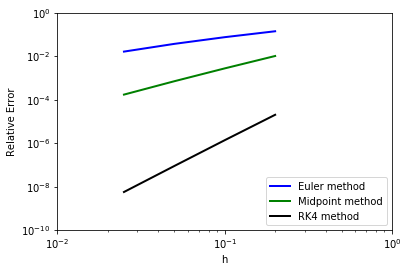

In [5]:
a, b, ya = 0., 2., 0.
def ode_f(x,y):
    return np.array([y - 2*x + 4.])
best_grid = 320                 #  number of subintervals in most refined grid
h = 2./best_grid
X, Y, h, n = initialize_all(a, b, ya, h)
# Requires an implementation of the euler method
best_val_eu = euler(ode_f, X, Y, h, n)[-1]
best_val_md = mid_point(ode_f, X, Y, h, n)[-1]
best_val_rk4 = RK4(ode_f, X, Y, h, n)[-1]
smaller_grids = [10, 20, 40, 80]  # number of subintervals in smaller grids
h = [2./N for N in smaller_grids]
Euler_sol = [euler(ode_f, initialize_all(a, b, ya, h[i])[0],
            initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
            for i, N in enumerate(smaller_grids)]
Midpoint_sol = [mid_point(ode_f, initialize_all(a, b, ya, h[i])[0],
                initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
                for i, N in enumerate(smaller_grids)]
RK4_sol = [RK4(ode_f, initialize_all(a, b, ya, h[i])[0],
           initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
           for i, N in enumerate(smaller_grids)]
Euler_error = [abs((val - best_val_eu)/best_val_eu) for val in Euler_sol]
Midpoint_error = [abs((val - best_val_md)/best_val_md) for val in Midpoint_sol]
RK4_error = [abs((val - best_val_rk4)/best_val_rk4) for val in RK4_sol]
plt.loglog(h, Euler_error, '-b', label="Euler method", linewidth=2.)
plt.loglog(h, Midpoint_error, '-g', label="Midpoint method", linewidth=2.)
plt.loglog(h, RK4_error, '-k', label="RK4 method", linewidth=2.)
plt.xlabel('h')
plt.ylabel('Relative Error')
plt.axis([10**(-2),1,10**(-10),1])
plt.legend(loc=4)
plt.show()

### Problem 3

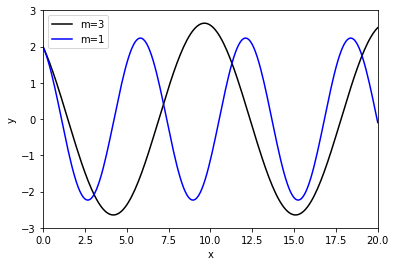

In [6]:
# Initialize functions and starting values
f1 = lambda x,y : np.array([y[1] , -y[0]])
f2 = lambda x,y : np.array([y[1] , -1./3*y[0]])
a = 0
b = 20
y0 = np.array([2. , -1.])
h = 0.1
X,Y1,h,n = initialize_all(a,b,y0,h)
X,Y2,h,n = initialize_all(a,b,y0,h)
# Use the RK4 method
y1 = RK4(f1,X,Y1,h,n)
y2 = RK4(f2,X,Y2,h,n)
# Plot
plt.plot(X,y2[:,0],'-k',label='m=3')
plt.plot(X,y1[:,0],'-b',label='m=1')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,20,-3,3])
plt.show()

### Problem 4

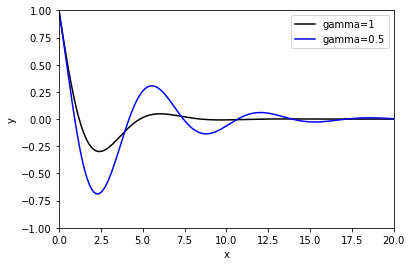

Gamma = 1   : y(20) = 0.00329061859393
Gamma = 0.5 : y(20) = 2.80845603631e-05


In [14]:
# Initialize functions and starting values
f1 = lambda x,y : np.array([y[1], -y[0]-1./2*y[1]])
f2 = lambda x,y : np.array([y[1], -y[0]-y[1]])
a = 0
b = 20
y0 = np.array([1.,-1.])
h = 0.1
X,Y1,h,n = initialize_all(a,b,y0,h)
X,Y2,h,n = initialize_all(a,b,y0,h)
# Use RK4
y1 = RK4(f1,X,Y1,h,n)
y2 = RK4(f2,X,Y2,h,n)
# Plot
plt.plot(X,y2[:,0],'-k',label='gamma=1')
plt.plot(X,y1[:,0],'-b',label='gamma=0.5')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,20,-1,1])
plt.show()
print("Gamma = 1   : y(20) = "+str(Y1[-1,0]))
print("Gamma = 0.5 : y(20) = "+str(Y2[-1,0]))

### Problem 5

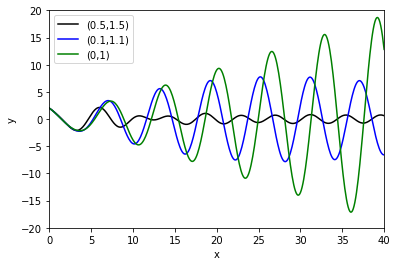

Gamma = 0.5 , Omega = 1.5 : y(40) = 0.618312741062
Gamma = 0.1 , Omega = 1.1 : y(40) = -6.58501211034
Gamma = 0.0 , Omega = 1.0 : y(40) = 12.8234759806


In [25]:
# Initialize functions and starting values
f1 = lambda x,y : np.array([y[1], np.cos(1.5*x)-0.5/2*y[1]-y[0]])
f2 = lambda x,y : np.array([y[1], np.cos(1.1*x)-0.1/2*y[1]-y[0]])
f3 = lambda x,y : np.array([y[1], np.cos(x)-y[0]])
a = 0
b = 40
y0 = np.array([2.,-1.])
h = 0.1
X,Y1,h,n = initialize_all(a,b,y0,h)
X,Y2,h,n = initialize_all(a,b,y0,h)
X,Y3,h,n = initialize_all(a,b,y0,h)
# Use RK4
y1 = RK4(f1,X,Y1,h,n)
y2 = RK4(f2,X,Y2,h,n)
y3 = RK4(f3,X,Y3,h,n)
# Plot
plt.plot(X,y1[:,0],'-k',label='(0.5,1.5)')
plt.plot(X,y2[:,0],'-b',label='(0.1,1.1)')
plt.plot(X,y3[:,0],'-g',label='(0,1)')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,40,-20,20])
plt.show()
print('Gamma = 0.5 , Omega = 1.5 : y(40) = '+str(y1[-1,0]))
print('Gamma = 0.1 , Omega = 1.1 : y(40) = '+str(y2[-1,0]))
print('Gamma = 0.0 , Omega = 1.0 : y(40) = '+str(y3[-1,0]))